## 0.회귀 분석의 종류

### Simple Linear Regression
- 단순 선형 회귀
- $y = \beta_{0} + \beta_{1} x + \epsilon$
- 하나의 X 값을 가지고 Y를 예측하는 것

### Multiple Linear Regression
- 다중 회귀
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 여러 개의 X 값을 가지고 Y를 예측하는 것

### Polynomial Regression
- 다항 회귀
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

### Ridge, Lasso Regression
- 독립변수들 간에 높은 상관 관계가 있는 경우 규제화 (regularization)를 적용해 모델의 복잡도를 줄임
- Ridge : 계수값을 0 에 가깝게 만들지만 0 이 되지 않음
- Lasso : 계수 값을 0 이 되게 함으로써 그에 해당하는 특성을 제외

## 1.데이터 만들기

### 1-1.함수 만들기

In [ ]:
# X : 키, 몸무게
# Y : BMI 예측

In [ ]:
import pandas as pd
import numpy as np

In [14]:
# bmi = 몸무게(kg) ÷ (신장(m) × 신장(m))
# 한국 표준 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
# startno : ID의 시작 번호
# outlier : 이상치 비율, 0.01 => 100개 정상데이터 1개 이상치
def make_sample(seedno, size, startno=0, outlier=0):
    np.random.seed(seedno)
    outlier_len=int(size*outlier)
    sizeh = size//2
    #키의 단위 cm
    hm = np.random.normal(loc=175,scale=5.3,size= sizeh +1 if size%2 else sizeh).round(1)
    hw = np.random.normal(loc=162,scale=5.2,size= sizeh).round(1)
    h= np.concatenate([hm,hw])
    h/=100 # 단위를 m로 변경
    bmi = np.random.normal(loc=23,scale=4,size=len(h))
    w=(h*h*bmi).round(1)
    bmi = (w/(h*h)).round(2)
    h*=100
    data= np.column_stack([h,w,bmi])
    #이상치 데이터 추가
    if outlier_len !=0:
        data_outlier = make_outlier(seedno, outlier_len)
        print(data_outlier,data_outlier.shape,sep='\n')
        data = np.concatenate([data,data_outlier])
    #'ID'를 포함한 DataFrame 생성 및 반환
    data = pd.DataFrame(data,columns=['height','weight','BMI'])
    data = data.sample(frac=1)
    data.insert(0,'ID',np.arange(startno,startno + len(data),dtype='int'))
    return data

In [15]:
np.random.normal(loc=175,scale=5.3,size= 1000).round(1)

array([174.9, 183.3, 181.3, 178.4, 181.7, 176.6, 165.7, 169.4, 174. ,
       166.8, 175.7, 175.9, 177.8, 175.3, 168.4, 175.8, 177.7, 163.1,
       167.3, 178.7, 177.8, 179.1, 168.5, 167.2, 177. , 173.8, 175.4,
       174.1, 172.7, 168.8, 183.8, 170.3, 182.9, 166.9, 173.1, 173.3,
       171.1, 169.1, 180. , 187. , 180.1, 178.3, 177.1, 168.9, 184.6,
       171.3, 172.9, 186.1, 184.3, 173.4, 169.5, 173.6, 173.6, 174.6,
       183.2, 183.1, 168.2, 175.8, 167. , 171.4, 179.5, 181.4, 171.4,
       179.3, 171.6, 175.5, 179. , 173.2, 169.6, 178.2, 167.5, 162.3,
       178. , 173. , 172.8, 174.8, 171.3, 173.4, 168.8, 163.6, 170.5,
       177.4, 175.6, 179.3, 175.5, 171.5, 178. , 178. , 179.9, 182.8,
       178.5, 179.8, 177. , 171.3, 178.8, 178.2, 171. , 181.2, 180.5,
       167.6, 170.2, 176. , 179.4, 180.9, 168.8, 170. , 178.8, 181.7,
       167.2, 170.3, 171.8, 183.3, 183.9, 172. , 186.1, 180.3, 171.6,
       170.6, 171. , 183.1, 171.7, 174.4, 165.3, 166. , 173.2, 173.4,
       178.9, 166.3,

In [16]:
# bmi = #몸무게(kg) ÷ (신장(m) × 신장(m))
# 키, 몸무게가 매우 작거나 큰 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
def make_outlier(seedno, size):
    np.random.seed(seedno) # 랜덤값 고정
    sizeh = size//2
    hlow = np.random.normal(loc = 120, scale=5.3, size=sizeh +1 if size%2 else sizeh).round(1) # 평균 120, 표준편차 5.3 sizeh+1만큼 추출
    hhigh = np.random.normal(loc=220,scale=5.2,size= sizeh).round(1)
    h = np.concatenate([hlow,hhigh]) # hlopw, hhigh 합산
    h/=100 # cm -> m로 변환
    bmi = np.random.normal(loc=23,scale=10,size=len(h))
    w= (h*h*bmi).round(1)
    bmi = (w/(h*h)).round(2)
    h*=100
    return np.column_stack([h,w,bmi])

In [17]:
# make_sample 사용연습
df= make_sample(1234,100,outlier=0.05)
df.shape

[[122.5   47.8   31.85]
 [113.7   40.8   31.56]
 [127.6   27.1   16.64]
 [218.4  110.5   23.17]
 [216.3    2.7    0.58]]
(5, 3)


(105, 4)

### 1-2.train, test 데이터

In [18]:
# [1] train, test 데이터 생성 및 파일로 저장하기
train = make_sample(1234,100)
test= make_sample(1,100,len(train))
Xfeatures = ['ID','height','weight']
Yfeatures = ['ID','BMI']
Xtrain = train[Xfeatures]
Ytrain = train[Yfeatures]
Xtest = test[Xfeatures]
Ytest = test[Yfeatures] # 시험에서 안줌
Xtrain.to_csv('x_train.csv',index=False)
Ytrain.to_csv('y_train.csv',index=False)
Xtest.to_csv('x_test.csv',index=False)
Ytest.to_csv('y_test.csv',index=False)

In [19]:
# [2] 각 데이터를 파일에서 읽어오기
# X_use, X_submission, Y, Y_hidden 이름 사용
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

In [20]:
# X_use, Y를 합쳐서 dfXY 생성
dfXY = pd.merge(X_use,Y)
dfXY.shape

(100, 4)

In [21]:
# dfXY의 상관 관계 확인
dfXY.corr()

,ID,height,weight,BMI
ID,1.0000,0.1407,-0.0230,-0.1083
height,0.1407,1.0000,0.6040,0.1789
weight,-0.0230,0.6040,1.0000,0.8877
BMI,-0.1083,0.1789,0.8877,1.0000


## 2.모델링, 성능평가

### 2-1.모델링 함수

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
# [1] 데이터를 분리하고, 학습 한 뒤, R2_score를 구해 출력
def Model_Train(model, XF, YF,scale=False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    # Xscaled = MinMaxScaler().fit_transform(XF)
    if scale:
        XF = MinMaxScaler().fit_transform(XF)
    xtrain, xtest, ytrain, ytest = train_test_split(XF,YF,test_size=0.3,random_state=321)
    model.fit(xtrain,ytrain)
    A=model.score(xtrain,ytrain)
    B=model.score(xtest,ytest)
    print(f'{A:.4f} {B:.4f}')
    return model

### 2-2. Multiple Linear Regression
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 오차(잔차)가 가장 적게 발생하는 계수, 절편 찾기

In [24]:
# [2] outlier가 포함되지 않은 경우, LinearRegression 모델 사용
# Temp = make_sample(1234,100)
Xnormal = X_use[['height','weight']]
Ynormal = Y['BMI']
model = LinearRegression()
Model_Train(model,Xnormal,Ynormal)

0.9931 0.9625


LinearRegression()

In [25]:
# [3] 계수들과 절편 출력해 보기
print(model.coef_,model.intercept_)

[-0.28008565  0.34383133] 47.629018625993695


### 2-3.이상치

In [26]:
# [4] 이상치를 포함한 데이터 생성 (outlier=0.07 사용)
Toutlier= make_sample(1234,100,outlier=0.07)
Xoutlier = Toutlier[['height','weight']]
Youtlier = Toutlier['BMI']

[[122.5   25.    16.66]
 [113.7   29.9   23.13]
 [127.6    0.9    0.55]
 [118.3   48.3   34.51]
 [216.3  154.    32.92]
 [224.6  164.1   32.53]
 [224.5   14.     2.78]]
(7, 3)


In [27]:
# [5] 이상치가 포함된 경우, LinearRegression 모델 사용
model2 = LinearRegression()
Model_Train(model2,Xoutlier,Youtlier)

0.9296 0.4557


LinearRegression()

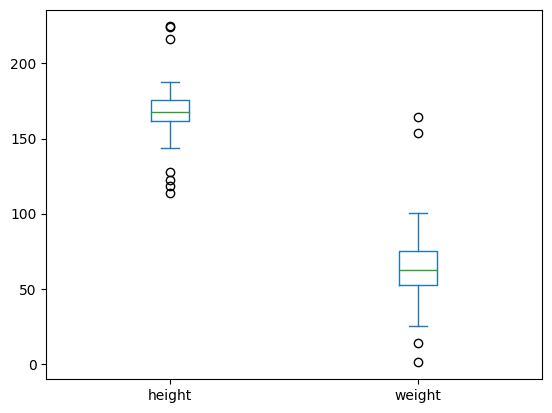

In [28]:
# [6] 그래프 사용하여 이상치 확인
import matplotlib.pyplot as plt
Xoutlier.plot(kind='box')
plt.show()

In [29]:
# [7] 각 feature별 Q1, Q3 확인
Xoutlier.quantile([0.25,0.75])

,height,weight
0.2500,162.0000,52.7500
0.7500,175.8500,75.0000


In [30]:
# [8] height에 대한 outlier 확인
Q1,Q3=Xoutlier['height'].quantile([0.25,0.75])
IQR = Q3-Q1
lower_h = round(Q1 - IQR*1.5,3)
upper_h = round(Q3 + 1.5*IQR,3)
print(lower_h,upper_h)

141.225 196.625


In [31]:
# [9] weight에 대한 outlier 확인
Q1,Q3=Xoutlier['weight'].quantile([0.25,0.75])
IQR = Q3-Q1
lower_w = round(Q1 - IQR*1.5,3)
upper_w = round(Q3 + 1.5*IQR,3)
print(lower_w,upper_w)

19.375 108.375


In [32]:
# [10] height에 대한 outlier 제거 및 학습
height = Xoutlier['height']
outlier_h=Xoutlier[(height<lower_h)|(height>upper_h)]
# print(outlier_h)
Xoutlier_rh = Xoutlier.drop(index=outlier_h.index)
Youtlier_rh = Youtlier.drop(index=outlier_h.index)
# print(Xoutlier_rh.shape,Youtlier_rh.shape)
model3 = LinearRegression()
Model_Train(model3,Xoutlier_rh,Youtlier_rh)

0.9868 0.9935


LinearRegression()

In [33]:
# [11] weight에 대한 outlier 제거 및 학습
weight = Xoutlier['weight']
outlier_w=Xoutlier[(weight<lower_w)|(weight>upper_w)]
# print(outlier_w)
Xoutlier_rw = Xoutlier.drop(index=outlier_w.index)
Youtlier_rw = Youtlier.drop(index=outlier_w.index)
# print(Xoutlier_rw.shape,Youtlier_rw.shape)
model4 = LinearRegression()
Model_Train(model4,Xoutlier_rw,Youtlier_rw)

0.9731 0.9217


LinearRegression()

### 2-4.Polynomial Regression
- 다항 회귀
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

In [ ]:
# sklearn.preprocessing.PolynomialFeatures(degree=2, *,
#               interaction_only=False, include_bias=True, order='C')

In [34]:
# [12] PolynomialFeatures 사용하여 2차항이 포함되도록
# Xnormal을 변환 함 (PolynomialFeatures에 poly2, 변환 결과에 Xpoly2 이름 부여)
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
Xpoly2 = poly2.fit_transform(Xnormal)
model = LinearRegression()
Model_Train(model,Xpoly2,Ynormal)

1.0000 0.9988


LinearRegression()

In [35]:
# [13] Xpoly2의 shape 확인
print(Xnormal.shape,Xpoly2.shape)

(100, 2) (100, 5)


In [ ]:
# [14] poly2의 feature_names 확인
poly2.get_feature_names_out()

array(['height', 'weight', 'height^2', 'height weight', 'weight^2'],
      dtype=object)

In [36]:
# [15] Xpoly2의 상관계수 확인
pd.DataFrame(Xpoly2).corr()

,0,1,2,3,4
0,1.0000,0.6040,0.9995,0.7159,0.6022
1,0.6040,1.0000,0.6054,0.9877,0.9920
2,0.9995,0.6054,1.0000,0.7179,0.6051
3,0.7159,0.9877,0.7179,1.0000,0.9845
4,0.6022,0.9920,0.6051,0.9845,1.0000


In [37]:
# [16] PolynomialFeatures 사용하여 3차항이 포함되도록
# Xnormal을 변환 함 (PolynomialFeatures에 poly3, 변환 결과에 Xpoly3 이름 부여)
poly3 = PolynomialFeatures(degree=3,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
Xpoly3 = poly3.fit_transform(Xnormal)
model = LinearRegression()
Model_Train(model,Xpoly3,Ynormal)

1.0000 1.0000


LinearRegression()

In [ ]:
# [17] Xpoly3의 shape 확인
print(Xpoly3.shape)

(100, 9)


In [ ]:
# [18] poly3의 shape 확인
poly3.get_feature_names_out()

array(['height', 'weight', 'height^2', 'height weight', 'weight^2',
       'height^3', 'height^2 weight', 'height weight^2', 'weight^3'],
      dtype=object)

### 2-5.Ridge Regression
- sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
- coef(회귀계수)가 작아지지만 0이 되지는 않음

In [ ]:
# alpha=0 : 규제를 주지 않음
# alpha 값이 크다는 것은 규제를 크게 주겠다는 것을 의미 => coef_ 값들이 작아짐

In [38]:
# [19] PolynomialFeatures degree=3과 Ridge를 사용한 모델링
#권장 순서
# X -> Xscaled ->Xpoly -> fit() / int보다 float가 표현범위가 넓음
from sklearn.linear_model import Ridge
Xscaled=MinMaxScaler().fit_transform(Xnormal)
poly3 = PolynomialFeatures(degree=3,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
Xpoly3 = poly3.fit_transform(Xscaled)
ridge_coef = pd.DataFrame()
for a in [0,0.001,0.1,1,10]:
  print(f'alpha={a:7.4f}',end='  ')
  model = Ridge(alpha=a,random_state=0)
  Model_Train(model,Xpoly3,Ynormal,scale=True)
  ridge_coef[f'alpha_{a}'] = model.coef_

alpha= 0.0000  1.0000 1.0000
alpha= 0.0010  0.9999 0.9978
alpha= 0.1000  0.9890 0.9755
alpha= 1.0000  0.9107 0.9133
alpha=10.0000  0.5968 0.5496


In [ ]:
''' 스케일링전
alpha= 0.0000  1.0000 1.0000
alpha= 0.0010  0.9994 0.9962
alpha= 0.1000  0.9874 0.9499
alpha= 1.0000  0.9480 0.9279
alpha=10.0000  0.6938 0.6471
'''

In [ ]:
# [20] ridge_coef 출력하여 회귀계수 확인
ridge_coef

,alpha_0,alpha_0.001,alpha_0.1,alpha_1,alpha_10
0,-73.109478,-14.770202,-4.350133,-3.449517,-0.663046
1,131.354160,31.716423,11.090243,5.414167,2.308375
2,141.656039,-2.088447,-4.659543,-3.527552,-0.664110
3,-209.987752,1.363581,6.050911,3.443241,1.758562
4,0.799485,11.453945,4.517197,4.032551,2.143902
5,-69.080548,10.829774,-4.981092,-3.595744,-0.662633
6,94.806642,-14.604358,2.300521,1.985839,1.335582
7,-1.086255,-11.450236,1.205406,3.002338,1.903592
8,0.109442,-1.314782,-1.817746,2.610686,1.922268


In [ ]:
ridge_coef.abs().sum()

alpha_0        721.989799
alpha_0.001     99.591749
alpha_0.1       40.972792
alpha_1         31.061635
alpha_10        13.362070
dtype: float64

### 2-6.Lasso Regression
- sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
- 규제강도가 커지면 회귀계수가 작아지고 0도 될 수 있다

In [ ]:
#비권장 순서
# X -> Xpoly ->Xscaled -> fit()
tX=pd.DataFrame({'A':[1,10,100,1000,10000,100000]})
t4 = tX**4
t4['A']

0                      1
1                  10000
2              100000000
3          1000000000000
4      10000000000000000
5    7766279631452241920
Name: A, dtype: int64

In [ ]:
#권장 순서
# X -> Xscaled ->Xpoly -> fit()
tX=pd.DataFrame({'A':[1,10,100,1000,10000,100000]})
tS = MinMaxScaler().fit_transform(tS)
t4 = tS**4
t4

array([[0.00000000e+00],
       [6.56126245e-17],
       [9.60634435e-13],
       [9.96045837e-09],
       [9.99640045e-05],
       [1.00000000e+00]])

In [39]:
# [21] degree=3과 Lasso를 사용한 모델링
from sklearn.linear_model import Lasso
Xscaled=MinMaxScaler().fit_transform(Xnormal)
poly3 = PolynomialFeatures(degree=3,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
Xpoly3 = poly3.fit_transform(Xscaled)
lasso_coef = pd.DataFrame()
for a in [0.0001,0.001,0.1,0.2,0.3]:
  print(f'alpha={a:7.4f}',end='  ')
  model = Lasso(alpha=a,max_iter=1000, tol=0.001,random_state=0)
  Model_Train(model,Xpoly3,Ynormal,scale=True)
  lasso_coef[f'alpha_{a}'] = model.coef_

alpha= 0.0001  0.9998 0.9985
alpha= 0.0010  0.9995 0.9987
alpha= 0.1000  0.9253 0.9262
alpha= 0.2000  0.7656 0.6763
alpha= 0.3000  0.7096 0.6361


In [ ]:
''' 스케일링전
alpha= 0.0001  0.9979 0.9938
alpha= 0.0010  0.9964 0.9851
alpha= 0.1000  0.9246 0.9180
alpha= 0.2000  0.7656 0.6763
alpha= 0.3000  0.7096 0.6361
'''

In [ ]:
# [22] lasso_coef 출력하여 회귀계수 확인
lasso_coef

,alpha_0.0001,alpha_0.001,alpha_0.1,alpha_0.2,alpha_0.3
0,4.805105,-0.000000,-0.000000,-0.000000,-0.000000
1,33.607995,26.482969,17.107670,12.632765,10.690377
2,-17.123098,-11.091911,-0.000000,-0.000000,-0.000000
3,-2.296627,-0.160488,0.000000,0.000000,0.000000
4,0.000000,-0.000000,0.000000,0.000000,0.000000
5,4.748478,-0.000000,-5.281175,-0.000000,-0.000000
6,-10.289303,-1.800514,0.000000,0.000000,0.000000
7,-1.541214,-1.008017,0.000000,0.000000,0.000000
8,-0.905310,-2.147514,0.000000,0.000000,0.000000


In [ ]:
# Ridge, Lasso는 overfitting 되는 데이터에 주로 사용하여 overfitting을 해결하는 용도로 사용한다

### 2-7.DecisionTree
- sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

In [ ]:
# [22] Xnormal, Ynormal 데이터에 DecisionTreeRegressor 사용
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 8,random_state=0)
Model_Train(model,Xnormal,Ynormal)

0.9999 0.7974


DecisionTreeRegressor(max_depth=8, random_state=0)

In [ ]:
# train  test
# 1.0000 0.7371  => overfitting, 과대적합
# 과대적합 해결방법 => Ridge, Lasso, 앙상블
#                      데이터의 크기를 늘리는 것, 함수의 parameter에 값을 변경

In [ ]:
# [23] 데이터의 개수를 2000개로 늘려 DecisionTreeRegressor 사용
dataL=make_sample(1234,2000)
Xlarge = dataL[['height','weight']]
Ylarge = dataL['BMI']
model = DecisionTreeRegressor(random_state=0)
Model_Train(model,Xlarge,Ylarge)

1.0000 0.9903


DecisionTreeRegressor(random_state=0)

### 2-8.앙상블

- sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
# [24] Xnormal, Ynormal 데이터에 RandomForestRegressor 사용
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
Model_Train(model,Xnormal,Ynormal)

0.9897 0.8219


RandomForestRegressor(random_state=0)

In [ ]:
# [25] Xnormal을 2차식으로 만든 후 RandomForestRegressor 사용
poly2 = PolynomialFeatures(degree=2,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
Xpoly2 = poly2.fit_transform(Xnormal)
model = RandomForestRegressor(random_state=0)
Model_Train(model,Xpoly2,Ynormal)

0.9890 0.8020


RandomForestRegressor(random_state=0)

In [ ]:
# [26] 데이터의 개수를 2000개로 늘려 RandomForestRegressor 사용
dataL=make_sample(1234,2000) #150개 이상되도 좋은 결과
Xlarge=dataL[['height','weight']]
Ylarge=dataL['BMI']
model = RandomForestRegressor(300, random_state=0) # estimator를 늘려도 비슷함
Model_Train(model,Xlarge,Ylarge)

0.9994 0.9967


RandomForestRegressor(n_estimators=300, random_state=0)

- XBGRegressor : max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective="reg:linear", booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type="gain", **kwargs)

In [ ]:
# [27] Xnormal, Ynormal 데이터에 XGBRegressor 사용
from xgboost import XGBRegressor
model = XGBRegressor(objective = 'reg:squarederror',random_state=0) # estimator를 늘려도 비슷함
Model_Train(model,Xnormal,Ynormal)

1.0000 0.8944


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [ ]:
# [28] 데이터의 개수를 2000개로 늘려 XGBRegressor 사용
dataL=make_sample(1234,2000) #150개 이상되도 좋은 결과
Xlarge=dataL[['height','weight']]
Ylarge=dataL['BMI']
model = XGBRegressor(n_estimators=900,objective = 'reg:squarederror',random_state=0) # estimator를 늘려도 비슷함
Model_Train(model,Xlarge,Ylarge)

1.0000 0.9967


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

## 3.회귀 모델 성능평가

- $R^2$ score
  - model.score(X, y)
  - sklearn.metrics.r2_score(y_true, y_pred)
  - 분산 기반으로 예측 성능을 평가
  - 예측값 분산 / 실제값 분산
- MAE(Mean Absolute Error)
   - sklearn.metrics.mean_absolute_error(y_true, y_pred)
   - 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것
- MSE(Mean Squared Error)
   - sklearn.metrics.mean_squared_error(y_true, y_pred)  
   - 실제 값과 예측 값의 차이를 제곱해 평균한 것
- RMSE(Root Mean Squared Error)
   - sklearn API에 없음
   - MSE에 np.sqrt() 또는 ** 0.5를 사용함
   - MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 것
- MSLE(Mean Squared Log Error)
   - sklearn.metrics.mean_squared_log_error(y_true, y_pred)
   - MSE에 로그를 적용해준 지표
- RMSLE(Root Mean Square Logarithmic Error)
   - RMSE에 로그를 적용해준 지표
   - 이상치가 있더라도 변동폭이 크지 않음(이상치에 강건함)
   - 실제값보다 예측값이 작을 때 더 큰 패널티 부여
   - 작게 예측하면 안되는 경우 사용하면 좋음 (배달 시간 예측)
   - 실제값, 예측값에 음수가 있으면 안됨 (오류 발생)
- 참조 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

### 3-1.성능평가 함수

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

# [29] r2_score, mae, mse, rmse, msle, rmsle 를 구해 반환하는 함수를 작성합니다.
# 한 개의 행에 6가지 성능평가 결과를 소수점 아래 4자리까지 표시되도록 하여 작성합니다.
def get_scores(model, X, Y):
    pred = model.predict(X)
    #음수가 있어도 상관없음
    A= r2_score(Y,pred)
    B=mae(Y,pred)
    C=mse(Y,pred)
    E=np.sqrt(C) #rmse
    #msle, rmsle는 음수여서는 안됨
    # pred[0]=-2
    pred = np.where(pred<0, 0, pred)
    # print(pred[0])
    D=msle(Y,pred)
    F=np.sqrt(D) #rmsle
    return f'r2:{A:.4} mae:{B:.4} mse:{C:.4} msle:{D:.4} rmse {E:.4} rmsle:{F:.4}'

### 3-2.모델링 함수

In [41]:
# [30] Model_Train함수를 수정해서
# train, test에 대한 6가지 성능평가 결과를 출력하는 Model_Train2 함수를 작성합니다.
def Model_Train_2(model, XF, YF, scale=False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    if scale:
        XF = MinMaxScaler().fit_transform(XF)
    xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                    test_size=0.3,
                                                    random_state=321)
    model.fit(xtrain, ytrain)
    #  코드 추가 부분
    print('train:',get_scores(model,xtrain,ytrain))
    print('test:',get_scores(model,xtest,ytest))
    return model

### 3-3.여러 모델 적용

In [42]:
# [31] Xnormal, Ynormal 데이터 사용, LinearRegression => model1
model1 = LinearRegression()
Model_Train_2(model1,Xnormal,Ynormal)

train: r2:0.9931 mae:0.2648 mse:0.12 msle:0.0002734 rmse 0.3464 rmsle:0.01653
test: r2:0.9625 mae:0.3783 mse:0.3626 msle:0.0009766 rmse 0.6022 rmsle:0.03125


LinearRegression()

In [ ]:
# 음수값을 임의로 0으로 수정한 경우 msle, rmsle의 값이 커짐
# train: r2:0.9931 mae:0.2648 mse:0.12 msle:0.1763 rmse 0.3464 rmsle:0.4199
# test: r2:0.9625 mae:0.3783 mse:0.3626 msle:0.3443 rmse 0.6022 rmsle:0.5868

In [43]:
# [32] Xpoly3, Ynormal 데이터 사용, LinearRegression => model2
poly3 = PolynomialFeatures(degree=3,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
Xpoly3 = poly3.fit_transform(Xnormal)
model2 = LinearRegression()
print(Xpoly3.shape)
Model_Train_2(model2,Xpoly3,Ynormal)

(100, 9)
train: r2:1.0 mae:0.002813 mse:1.09e-05 msle:1.991e-08 rmse 0.003302 rmsle:0.0001411
test: r2:1.0 mae:0.006752 mse:0.0004418 msle:1.257e-06 rmse 0.02102 rmsle:0.001121


LinearRegression()

In [44]:
# [33] Xlarge, Ylarge 데이터 사용, XGBRegressor => model3
dataL=make_sample(1234,2000) #150개 이상되도 좋은 결과
Xlarge=dataL[['height','weight']]
Ylarge=dataL['BMI']
model3 = XGBRegressor(n_estimators=300, objective='reg:squarederror',random_state=0) # estimator를 늘려도 비슷함
Model_Train_2(model3,Xlarge,Ylarge)

NameError: name 'XGBRegressor' is not defined

In [45]:
# [34] X_submission, Y_hidden 데이터를 사용하여 model1, model2, model3의 성능을 평가하여봄
# (실제는 할 수 없음)
XF = X_submission[['height','weight']]
YF = Y_hidden['BMI']
XFpoly3 = poly3.fit_transform(XF)
print(get_scores(model1,XF,YF))
print(get_scores(model2,XFpoly3,YF))
print(get_scores(model3,XF,YF))

r2:0.9892 mae:0.2701 mse:0.1499 msle:0.0003649 rmse 0.3871 rmsle:0.0191
r2:1.0 mae:0.003643 mse:2.242e-05 msle:4.639e-08 rmse 0.004735 rmsle:0.0002154
r2:0.9879 mae:0.2921 mse:0.1678 msle:0.0003274 rmse 0.4096 rmsle:0.01809


In [46]:
# [35] 제출파일 만들기 (실제 문제에서 요구하는 형태로 작성해야 함)
pred=model2.predict(XFpoly3)
submission = pd.DataFrame({'ID':X_submission['ID'],
                           'BMI':pred})
# submission.head()
submission.to_csv('0001100.csv',index=False)

## 4.웹사이트 방문자 예측

In [47]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...


### 4-1. 데이터 이해, 생성
- 1개 데이터를 나누어 시험용으로 변경해 보는 작업
- 실제 시험에서는 이런 과정은 필요 없음


In [ ]:
# https://www.kaggle.com/bobnau/daily-website-visitors
# Daily number of pages loaded
# Daily number of visitors from whose IP addresses there haven't been hits on any page in over 6 hours
# Number of unique visitors who do not have a cookie identifying them as a previous customer
# Number of unique visitors minus first time visitors

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score,r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.float_format','{:.4f}'.format)

In [49]:
make_models(xtrain,xtest,ytrain,ytest)

NameError: name 'xtrain' is not defined

In [7]:
def get_scores(model,xtrain,xtest,ytrain,ytest):
  pred1=model.predict(xtrain)
  pred2=model.predict(xtest)
  A=r2_score(pred1,ytrain)
  B=r2_score(pred2,ytest)
  C=mse(pred2,ytest)
  D=mae(pred2,ytest)
  E=np.sqrt(C)
  pred2 = np.where(pred2<0,0,pred2)
  F=msle(pred2,ytest)
  G=np.sqrt(F)
  data = [round(x,4) for x in [A,B,C,D,E,F,G]]
  names = 'r2_score(train) r2_score(test) mse mae rmse msle rmsle'.split()
  score = pd.DataFrame(data,index=names)
  return score

In [100]:
def make_models(xtrain,xtest,ytrain,ytest,n=300,RL=False):
  temp = pd.DataFrame()

  if not RL:

    for k in range(1,4):
      poly1 = PolynomialFeatures(degree=k,include_bias=False).fit_transform(xtrain)
      poly2 = PolynomialFeatures(degree=k,include_bias=False).fit_transform(xtest)
      model1 = LinearRegression().fit(poly1,ytrain)
      temp[f'model1_{k}'] = get_scores(model1,poly1,poly2,ytrain,ytest)

    model2 = RandomForestRegressor(n,random_state=123).fit(xtrain,ytrain)
    temp['model2'] = get_scores(model2,xtrain,xtest,ytrain,ytest)

    for k in range(3,8):
      model2 = RandomForestRegressor(n,max_depth=k,random_state=123).fit(xtrain,ytrain)
      temp[f'model2_{k}'] = get_scores(model2,xtrain,xtest,ytrain,ytest)

    model3 = DecisionTreeRegressor(random_state=123).fit(xtrain,ytrain)
    temp['model3'] = get_scores(model3,xtrain,xtest,ytrain,ytest)

    # for k in range(3,8):
    #   model3 = DecisionTreeRegressor(max_depth=k,random_state=123).fit(xtrain,ytrain)
    #   temp[f'model3_{k}'] = get_scores(model3,xtrain,xtest,ytrain,ytest)

    # model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
    # temp[f'model4'] = get_scores(model4,xtrain,xtest,ytrain,ytest)

  if RL:
    for d in [0.01,0.1,0.5,1,2]:
      model5 = Ridge(alpha=d).fit(xtrain,ytrain)
      temp[f'model5_{d}'] = get_scores(model5,xtrain,xtest,ytrain,ytest)

      model6 = Lasso(alpha=d).fit(xtrain,ytrain)
      temp[f'model6_{d}'] = get_scores(model6,xtrain,xtest,ytrain,ytest)

  return temp.T

In [52]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.min_rows',20)
pd.set_option('display.float_format','{:.4f}'.format)

In [53]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
# from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [90]:
# [1] 'bigdata/daily-website-visitors.csv' 파일 불러오기, shape 확인하기
df=pd.read_csv('bigdata/daily-website-visitors.csv',encoding='cp949')

In [91]:
df['Date'].ndim

1

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [77]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [93]:
# column=['Page.Loads', 'Unique.Visits','First.Time.Visits', 'Returning.Visits']
df.columns=df.columns.str.replace('.','_').str.lower() # regex=True 원래 포함해야함
df.columns

Index(['row', 'day', 'day_of_week', 'date', 'page_loads', 'unique_visits',
       'first_time_visits', 'returning_visits'],
      dtype='object')

In [94]:
# [2] head를 사용해 데이터의 모습 확인
# 컬럼명이 대소문자 섞여 있어 사용하기 좋지 않음
df['date']=pd.to_datetime(df['date'],format='%m/%d/%Y')
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df=df.drop(columns='date')
df.head()

,row,day,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,year,month
0,1,14,1,"2,146","1,582","1,430",152,2014,9
1,2,15,2,"3,621","2,528","2,297",231,2014,9
2,3,16,3,"3,698","2,630","2,352",278,2014,9
3,4,17,4,"3,667","2,614","2,327",287,2014,9
4,5,18,5,"3,316","2,366","2,130",236,2014,9


In [97]:
X= df.drop(columns=['unique_visits','first_time_visits', 'returning_visits'])
Y= df['unique_visits']

In [ ]:
col=['page_loads', 'unique_visits','first_time_visits', 'returning_visits']
for i in col:
  df[i] = df[i].str.replace(',','',regex=True).astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   row                2167 non-null   int64
 1   day                2167 non-null   int64
 2   day_of_week        2167 non-null   int64
 3   page_loads         2167 non-null   int64
 4   unique_visits      2167 non-null   int64
 5   first_time_visits  2167 non-null   int64
 6   returning_visits   2167 non-null   int64
 7   year               2167 non-null   int64
 8   month              2167 non-null   int64
dtypes: int64(9)
memory usage: 152.5 KB


In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.preprocessing import PolynomialFeatures
def get_score(model,xtrain,xtest,ytrain,ytest):
  pred1 = model.predict(xtrain)
  pred2 = model.predict(xtest)
  A= r2_score(pred1,ytrain)
  B= r2_score(pred2,ytest)
  C= mae(pred2,ytest)
  D=mse(pred2,ytest)
  E=np.sqrt(D)
  pred2=np.where(pred2<0,0,pred2)
  F = msle(pred2,ytest)
  G= np.sqrt(F)
  data = [round(x,4) for x in [A,B,C,D,E,F,G]]
  names = 'r2_score(train) r2_score(test) mae mse rmse msle rmsle'.split()
  score = pd.DataFrame(data,index=names)
  return score

In [98]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=123)

In [101]:
make_models(xtrain,xtest,ytrain,ytest)

ValueError: could not convert string to float: '4,389'

In [ ]:
def make_models(xtrain,xtest,ytrain,ytest,n=300,RL=False):
  temp = pd.DataFrame()

  for k in range(1,4):
    xpoly1 = PolynomialFeatures(degree=k,include_bias=False).fit_transform(xtrain)
    xpoly2 = PolynomialFeatures(degree=k,include_bias=False).fit_transform(xtest)
    model1 = LinearRegression().fit(xpoly1,ytrain)
    temp[f'model1_{k}'] = get_score(model1,xpoly1,xpoly2,ytrain,ytest)

  if not RL:
    model2 = DecisionTreeRegressor(random_state=123).fit(xtrain,ytrain)
    temp['model2'] = get_score(model2,xtrain,xtest,ytrain,ytest)


    for d in range(3,9):
      model2 = DecisionTreeRegressor(max_depth=d,random_state=123).fit(xtrain,ytrain)
      temp[f'model2_{d}'] = get_score(model2,xtrain,xtest,ytrain,ytest)

    model3 = RandomForestRegressor(n,random_state=123).fit(xtrain,ytrain)
    temp['model3'] = get_score(model3,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
      model3 = RandomForestRegressor(n,max_depth=d,random_state=123).fit(xtrain,ytrain)
      temp[f'model3_{d}'] = get_score(model3,xtrain,xtest,ytrain,ytest)

    model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
    temp['model4'] = get_score(model4,xtrain,xtest,ytrain,ytest)

  if RL:
    for k in [0.01,0.1,1,2]:
      model5 = Ridge(alpha=k).fit(xtrain,ytrain)
      temp[f'model5_{k}'] = get_score(model5,xtrain,xtest,ytrain,ytest)

      model6 = Lasso(alpha=k).fit(xtrain.ytrain)
      temp[f'model6_{k}'] = get_score(model6,xtrain,xtest,ytrain,ytest)

  return temp.T


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.preprocessing import PolynomialFeatures
def get_score2(model,xtrain,xtest,ytrain,ytest):
  ypred1=model.predict(xtrain)
  ypred2=model.predict(xtest)
  A=r2_score(ypred1,ytrain)
  B=r2_score(ypred2,ytest)
  C = mse(ypred2,ytest)
  D= mae(ypred2,ytest)
  E= np.sqrt(C)
  pred2 = np.where(ypred2<0,0,ypred2)
  F = msle(ypred2,ytest)
  G = np.sqrt(F)
  data = [round(x,4) for x in [A,B,C,D,E,F,G]]
  names = 'r2_train r2_test mse mae rmse msle rmsle'.split()
  scores = pd.Series(data,index=names)
  return scores

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=123)

In [ ]:
def make_models(xtrain,xtest,ytrain,ytest,n=300,RL=False):
  temp = pd.DataFrame()

  if not RL:
    model2 = DecisionTreeRegressor(random_state=1).fit(xtrain,ytrain)
    temp['model2'] = get_score2(model2,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
      model2 = DecisionTreeRegressor(max_depth=d,random_state=1).fit(xtrain,ytrain)
      temp[f'model2_{d}'] = get_score2(model2,xtrain,xtest,ytrain,ytest)

    model3 = RandomForestRegressor(n,random_state=1).fit(xtrain,ytrain)
    temp['model3'] = get_score2(model3,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
      model3 = RandomForestRegressor(n,max_depth=d,random_state=1).fit(xtrain,ytrain)
      temp[f'model3_{d}'] = get_score2(model3,xtrain,xtest,ytrain,ytest)

  model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
  temp['model4'] = get_score2(model4,xtrain,xtest,ytrain,ytest)

  if RL:
    for a in [0.01,0.1,1,2]:
      model5 = Ridge(alpha=a).fit(xtrain,ytrain)
      temp[f'model5_{a}']=get_score2(model5,xtrain,xtest,ytrain,ytest)

      model6 = Lasso(alpha=a).fit(xtrain,ytrain)
      temp[f'model6_{a}']=get_score2(model6,xtrain,xtest,ytrain,ytest)

  for k in range(1,4):
    poly = PolynomialFeatures(degree=k,include_bias=False) #생략하면 2 #interaction_only는 제곱항 다빠짐, inclue_bias는 상수항 빠짐
    Xpoly1 = poly.fit_transform(xtrain)
    Xpoly2 = poly.fit_transform(xtest)
    model7 = LinearRegression().fit(Xpoly1,ytrain)
    temp[f'model7_{k}'] =get_score2(model7,Xpoly1,Xpoly2,ytrain,ytest)

  temp = temp.T
  return temp

In [ ]:
make_models(xtrain,xtest,ytrain,ytest)

,r2_score(train),r2_score(test),mae,mse,rmse,msle,rmsle
model1_1,0.9790,0.9740,118.6715,22805.5345,151.0150,0.0025,0.0505
model1_2,0.9841,0.9801,108.4817,17735.7198,133.1755,0.0021,0.0462
model1_3,0.9909,0.9892,79.5953,9964.9620,99.8247,0.0016,0.0395
model2,1.0000,0.9843,92.9613,14325.0867,119.6875,0.0020,0.0443
model2_3,0.9561,0.9447,177.1205,48053.9749,219.2122,0.0073,0.0856
model2_4,0.9754,0.9640,142.1350,31322.5155,176.9817,0.0040,0.0636
model2_5,0.9834,0.9757,117.0543,21397.3526,146.2783,0.0026,0.0513
model2_6,0.9882,0.9819,101.1032,16089.5647,126.8446,0.0020,0.0448
model2_7,0.9920,0.9861,90.2686,12658.3777,112.5095,0.0017,0.0412
model2_8,0.9948,0.9880,82.0676,10979.2507,104.7819,0.0015,0.0393


In [ ]:
model = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
print(get_score(model,xtrain,xtest,ytrain,ytest))
pred = model.predict(xtest)
submission =pd.DataFrame({'row':xtest['row'],'unique_visits':pred})
#print(submission.head())
submission.to_csv('00001000.csv',index=False)

                        0
r2_score(train)    0.9996
r2_score(test)     0.9920
mae               68.0482
mse             7368.5685
rmse              85.8404
msle               0.0011
rmsle              0.0325


In [ ]:
model = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
print(get_score(model,xtrain,xtest,ytrain,ytest))
pred=model.predict(xtest)
submission = pd.DataFrame({'row':xtest['row'],'unique_visits':pred})
submission.to_csv('24234.csv',index=False)

In [ ]:
T=pd.read_csv('00001000.csv',encoding='cp949')
T.head(20)

,row,unique_visits
0,430,4536.4810
1,327,2627.5518
2,44,3801.3555
3,1593,3662.0352
4,1872,4274.7870
5,733,3481.1504
6,995,1799.1019
7,2062,4954.5170
8,1896,3242.8445
9,1190,1870.8208


In [ ]:
fd=pd.read_csv('00001000.csv')
fd.head(20)

,row,unique_visits
0,430,4536.4810
1,327,2627.5518
2,44,3801.3555
3,1593,3662.0352
4,1872,4274.7870
5,733,3481.1504
6,995,1799.1019
7,2062,4954.5170
8,1896,3242.8445
9,1190,1870.8208


In [ ]:
# [3] 컬럼명 정리 - 소문자로 변경, '.'을 '-'로 변경
df.columns =df.columns.str.replace('.','_',regex=True).str.lower()
df.head()

,row,day,day_of_week,date,page_loads,unique_visits,first_time_visits,returning_visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


컬럼 정보
- row : 1번 부터 시작하는 일련번호
- day : 요일 정보
- day_of_week : 요일 정보
- date : 날짜 정보
- page_loads : 로드된 일별 페이지 수
- unique_visits : 6시간 이상 페이지에서 조회되지 않은 IP 주소의 일일 방문자 수
- first_time_visits : 이전 고객으로 식별되는 쿠키를 가지고 있지 않은 고유 방문자 수
- returning_visits : unique_visits 수에서 first_time_visits 제외

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   object
 5   unique_visits      2167 non-null   object
 6   first_time_visits  2167 non-null   object
 7   returning_visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [ ]:
# [4] unique_visits를 예측하는 값으로 사용할 것이며, 수치데이터 이어야 함
# 콤마 제거 후, int로 형변환
df['unique_visits'] = df['unique_visits'].str.replace(',','',regex=True).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   object
 5   unique_visits      2167 non-null   int64 
 6   first_time_visits  2167 non-null   object
 7   returning_visits   2167 non-null   object
dtypes: int64(3), object(5)
memory usage: 135.6+ KB


In [ ]:
df.head()

,row,day,day_of_week,date,page_loads,unique_visits,first_time_visits,returning_visits
0,1,Sunday,1,9/14/2014,"2,146",1582,"1,430",152
1,2,Monday,2,9/15/2014,"3,621",2528,"2,297",231
2,3,Tuesday,3,9/16/2014,"3,698",2630,"2,352",278
3,4,Wednesday,4,9/17/2014,"3,667",2614,"2,327",287
4,5,Thursday,5,9/18/2014,"3,316",2366,"2,130",236


In [ ]:
# [5] 시험 형식으로 train, test 데이터로 나누어 저장합니다.  (6:4 비율)
train_size=len(df)-int(len(df)*0.4)
# 여러 가지 데이터가 고루 섞이도록 해야 함 (sample 이용)
df=df.sample(frac=1,random_state=1)
df['row'] = range(1,len(df)+1)
# train과 test로 분할
train=df.iloc[:train_size,:]
test=df.iloc[train_size:,:]
# 분할된거 확인
print(train.shape,test.shape)
# train과 test중 x,y로 분할
X_train=train.drop(columns='unique_visits')
Y_train=train[['row','unique_visits']]
X_test=test.drop(columns='unique_visits')
Y_test=test[['row','unique_visits']]
# 저장
X_train.to_csv('x_train.csv',index=False)
Y_train.to_csv('y_train.csv',index=False)
X_test.to_csv('x_test.csv',index=False)
Y_test.to_csv('y_test.csv',index=False)

(1301, 8) (866, 8)


### 4-2. 데이터 불러오기, 전처리

In [ ]:
# [1] 데이터 파일 불러오기
X_use = pd.read_csv('x_train.csv',encoding='cp949')
X_submission=pd.read_csv('x_test.csv',encoding='cp949')
Y = pd.read_csv('y_train.csv',encoding='cp949')
Y_hidden = pd.read_csv('y_test.csv',encoding='cp949')

In [ ]:
# [2] dfX 만들기, dfX의 info() 확인
# use, submission 데이터를 묶어 전처리 하기 위함
dfX = pd.concat([X_use,X_submission],axis=0,ignore_index=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   object
 5   first_time_visits  2167 non-null   object
 6   returning_visits   2167 non-null   object
dtypes: int64(2), object(5)
memory usage: 118.6+ KB


In [ ]:
# [3] dfX의 object 값이 어떤 것인지 확인하기 위해 5줄 출력을 합니다.
dfX.head()

,row,day,day_of_week,date,page_loads,first_time_visits,returning_visits
0,1,Wednesday,4,4/19/2017,5369,3133,719
1,2,Monday,2,9/11/2017,3570,2033,463
2,3,Sunday,1,7/14/2019,2580,1433,321
3,4,Saturday,7,12/1/2018,4055,2306,494
4,5,Wednesday,4,12/21/2016,3991,2278,636


In [ ]:
# [4] 'page_loads', 'first_time_visits', 'returning_visits' 에 대해서
#  콤마를 없애고, int로 형변환 합니다
names = ['page_loads', 'first_time_visits', 'returning_visits']
dfX[names] = dfX[names].replace(',','',regex=True).astype('int')
dfX.info()
# dfX['page_loads'].str.replace(',','',regex=True).astype(int) # str없는것도 가능함. str없는거는 여러개 한번에 리플레이스 가능하며 원래 이렇게 하면됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   int64 
 5   first_time_visits  2167 non-null   int64 
 6   returning_visits   2167 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 118.6+ KB


In [ ]:
# [5] 'date'에 대해서 datetime64로 형변환 합니다.
# dfX['date'] = dfX['date'].astype('object')
dfX['date'] = pd.to_datetime(dfX['date'],format='%m/%d/%Y')
dfX.head()

,row,day,day_of_week,date,page_loads,first_time_visits,returning_visits
0,1,Wednesday,4,2017-04-19,5369,3133,719
1,2,Monday,2,2017-09-11,3570,2033,463
2,3,Sunday,1,2019-07-14,2580,1433,321
3,4,Saturday,7,2018-12-01,4055,2306,494
4,5,Wednesday,4,2016-12-21,3991,2278,636


In [ ]:
# [6] 형변환이 올바르게 되었는지 확인합니다.
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   row                2167 non-null   int64         
 1   day                2167 non-null   object        
 2   day_of_week        2167 non-null   int64         
 3   date               2167 non-null   datetime64[ns]
 4   page_loads         2167 non-null   int64         
 5   first_time_visits  2167 non-null   int64         
 6   returning_visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 118.6+ KB


In [ ]:
# [7] day, day_of_week를 확인해 보면 동일한 데이터 인 것을 알 수 있음
# 'day' 컬럼을 제거합니다.
dfX = dfX.drop(columns='day')
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   row                2167 non-null   int64         
 1   day_of_week        2167 non-null   int64         
 2   date               2167 non-null   datetime64[ns]
 3   page_loads         2167 non-null   int64         
 4   first_time_visits  2167 non-null   int64         
 5   returning_visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 101.7 KB


In [ ]:
# [8] 'date'에서 'year', 'month', 'day'에 대한 정보를 dfX3에 포함시키고, 'date' 를 제거합니다.
# 상황에 따라 'quarter' 사용도 고려할 수 있음, 주말/주중으로 나눌 수도 있음 ...
temp = dfX['date'].dt
dfX['year'] =temp.year
dfX['month'] =temp.month
dfX['day'] =temp.day
dfX=dfX.drop(columns='date')
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   row                2167 non-null   int64
 1   day_of_week        2167 non-null   int64
 2   page_loads         2167 non-null   int64
 3   first_time_visits  2167 non-null   int64
 4   returning_visits   2167 non-null   int64
 5   year               2167 non-null   int64
 6   month              2167 non-null   int64
 7   day                2167 non-null   int64
dtypes: int64(8)
memory usage: 135.6 KB


In [ ]:
# [9] dfX3과 Y를 merge 합니다.
# Y와 X의 feature의 관계를 분석해 보기 위해!
dfXY = pd.merge(dfX,Y)
print(dfXY.shape,dfX.shape,Y.shape)

(1301, 9) (2167, 8) (1301, 2)


In [ ]:
# [10] dfXY의 상관계수를 확인한다
# 'unique_visits'와 상관이 매우 높은 feature들이 있음 (page_loads, first_time_visits, returning_visits)
print(dfXY.corr()['unique_visits'])

row                 -0.0142
day_of_week         -0.2694
page_loads           0.9887
first_time_visits    0.9962
returning_visits     0.9041
year                 0.0916
month               -0.0462
day                 -0.0907
unique_visits        1.0000
Name: unique_visits, dtype: float64


In [ ]:
# [11] 'day_of_week' 별 'unique_visits'의 평균을 구해본다.
# 2, 3, 4, 5 가 높고 1, 6, 7이 낮은 것을 볼 수 있다.
temp=dfXY.groupby('day_of_week')['unique_visits'].mean()
temp

day_of_week
1   2316.4353
2   3428.0156
3   3547.3936
4   3537.0168
5   3292.4974
6   2660.7202
7   1782.1895
Name: unique_visits, dtype: float64

In [ ]:
# [12] 'day_of_week' 별 평균이 높은 것에 대한 데이터를 high_day_of_week로 저장
high_day_of_week = temp[temp>3000].index.values
high_day_of_week

array([2, 3, 4, 5])

In [ ]:
# [13] 'month' 별 'unique_visits'의 평균을 구해본다.
# 2, 3, 4, 5, 10, 11이 높고 1, 6, 7이 낮은 것을 볼 수 있다.
temp = dfXY.groupby('month')['unique_visits'].mean()
temp

month
1    2588.9060
2    3138.4952
3    3253.4595
4    3734.1782
5    3436.3645
6    2625.2857
7    2198.9741
8    2207.1122
9    2699.1209
10   3341.2373
11   3357.3981
12   2769.7391
Name: unique_visits, dtype: float64

In [ ]:
# [14] 'month' 별 평균이 높은 것에 대한 데이터를 high_month로 저장
high_month = temp[temp > 3000].index.values
high_month

array([ 2,  3,  4,  5, 10, 11])

In [ ]:
# [15] high_day_of_week, high_month의 index 정보를 사용해 파생 변수 생성
# dfX3에 높은 평균을 갖는 요일과 달을 1, 아닌 것을 0으로 하는 dow_h, month_h 변수 추가
dfX['dow_h'] = dfX['day_of_week'].isin(high_day_of_week).astype(int)
dfX['month_h'] = dfX['month'].isin(high_month).astype(int)
dfX.head()
# np.where(dfX3['day_of_week'].isin(high_day_of_week),1,0)


,row,day_of_week,page_loads,first_time_visits,returning_visits,year,month,day,dow_h,month_h
0,1,4,5369,3133,719,2017,4,19,1,1
1,2,2,3570,2033,463,2017,9,11,1,0
2,3,1,2580,1433,321,2019,7,14,0,0
3,4,7,4055,2306,494,2018,12,1,0,0
4,5,4,3991,2278,636,2016,12,21,1,0


In [ ]:
temp=dfXY.groupby('year')['unique_visits'].mean()
temp

year
2014   2480.7917
2015   2885.8578
2016   3277.2018
2017   2435.9234
2018   3057.4977
2019   3054.2441
2020   3181.0071
Name: unique_visits, dtype: float64

### 4-3.성능평가, 모델링 함수


In [ ]:
#[16] 사용할 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
data.info()
from scipy.stats import pearsonr
print(data.corr(method='spearman'))
print(data.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
        age     sex     bmi      bp     s1      s2      s3      s4      s5  \
age  1.0000  0.1775  0.2006  0.3509 0.2625  0.2217 -0.1070  0.2210  0.2652   
sex  0.1775  1.0000  0.0981  0.2615 0.0278  0.1347 -0.3946  0.3375  0.1746   
bmi  0.2006  0.0981  1.0000  0.3980 0.2878  0.2955 -0.3712  0.4591  0.4916   
bp   0.3509  0.2615  0.3980  1.0000 0.2752  0.2056 -0.1910  0.2808  0.3961   
s1   0.2625  0.0278

In [ ]:
target=diabetes.target
from scipy.stats import linregress
model = linregress(x=data['bmi'], y= target)
print(model)

LinregressResult(slope=949.4352603840384, intercept=152.13348416289617, rvalue=0.5864501344746884, pvalue=3.466006445167547e-42, stderr=62.515122002852664, intercept_stderr=2.973541118790735)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
col = ['bmi','bp','s1','s2','s3']
model=LinearRegression().fit(data[col],y=target)
print(model.coef_, model.intercept_)
print(model.score(data[col],y=target))
model = Ridge(alpha=0.1).fit(data[col],y=target)
print(model.coef_,model.intercept_)
print(model.score(data[col],y=target))


NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
accuracy = accuracy_score(y_true,y_pred)
recall=recall_score(y_true,y_pred)
print(accuracy,recall,precision_score(y_true,y_pred),f1_score(y_true,y_pred))
y_true = [0,0,0,1,1,1]
y_pred = [0,1,0,1,1,1]
confusion_matrix(y_true,y_pred)


0.8333333333333334 1.0 0.75 0.8571428571428571


array([[2, 1],
       [0, 3]])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# [17] r2_train, r2_test, mae, mse, rmse, msle, rmsle 를 구해
#      Series로 반환하는 함수를 작성합니다.
def get_scores2(model,xtrain,xtest,ytrain,ytest):
    pred1=model.predict(xtrain)
    pred2=model.predict(xtest)

    # 음수가 있어도 노상관인것들
    A1=r2_score(ytrain,pred1)
    A2=r2_score(ytest,pred2)
    B = mae(ytest,pred2)
    C = mse(ytest,pred2)
    E=np.sqrt(C)

    # msle, rmsle는 음수가 안댐
    pred2 = np.where(pred2<0,0,pred2)
    D = msle(ytest,pred2)
    F = np.sqrt(D)
    data = [round(x,4) for x in [A1,A2,B,C,D,E,F]]
    names = 'r2_train r2_test mae mse msle rmse rmsle'.split()
    scores = pd.Series(data,index=names)
    return scores

In [ ]:
# [18] 다양한 모델을 만들고 성능을 출력하는 함수 작성
# 결과를 DataFrame으로 만듭니다
def make_models(xtrain,xtest,ytrain,ytest,n=300,RL=False):
  temp = pd.DataFrame()

  model1 = LinearRegression().fit(xtrain,ytrain)
  temp['model1']=get_scores2(model1,xtrain,xtest,ytrain,ytest)

  if not RL:
    model2 = DecisionTreeRegressor(random_state=0).fit(xtrain,ytrain)
    temp['model2'] = get_scores2(model2,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
      model2 = DecisionTreeRegressor(max_depth=d,random_state=0).fit(xtrain,ytrain)
      temp[f'model2_{d}'] = get_scores2(model2,xtrain,xtest,ytrain,ytest)

    model3 = RandomForestRegressor(n,random_state=0).fit(xtrain,ytrain)
    temp['model3'] = get_scores2(model3,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
      model3 = RandomForestRegressor(n,max_depth=d,random_state=0).fit(xtrain,ytrain)
      temp[f'model3_{d}'] = get_scores2(model3,xtrain,xtest,ytrain,ytest)

  model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
  temp['model4'] = get_scores2(model4,xtrain,xtest,ytrain,ytest)

  if RL:
    for a in [0.01,0.1,1,2]:
      model5 = Ridge(alpha=a).fit(xtrain,ytrain)
      temp[f'model5_{a}'] = get_scores2(model5,xtrain,xtest,ytrain,ytest)

      model6 = Lasso(alpha=a).fit(xtrain,ytrain)
      temp[f'model6_{a}'] = get_scores2(model6,xtrain,xtest,ytrain,ytest)

  temp = temp.T
  temp.insert(2,'diff'(temp['r2_train']-temp['r2_test']).abs())
  return temp


<>:36: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:36: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-39-00c4675f5b71>:36: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  temp.insert(2,'diff'(temp['r2_train']-temp['r2_test']).abs())


In [ ]:
dfX3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   row                2167 non-null   int64
 1   day_of_week        2167 non-null   int64
 2   page_loads         2167 non-null   int64
 3   first_time_visits  2167 non-null   int64
 4   returning_visits   2167 non-null   int64
 5   year               2167 non-null   int64
 6   month              2167 non-null   int64
 7   day                2167 non-null   int64
 8   dow_h              2167 non-null   int64
 9   month_h            2167 non-null   int64
dtypes: int64(10)
memory usage: 169.4 KB


### 4-4.데이터 분리, 모델적용

In [ ]:
# [19] 학습에 사용할 feature 선택,
# dfX4로 저장
# 'page_loads','first_time_visits' => 이것을 사용하면 성능이 무지 좋아요. (높은 상관계수)
from sklearn.preprocessing import MinMaxScaler
Xfeatures = ['day_of_week',# 'page_loads', 'first_time_visits',
             'returning_visits', 'year', 'month', 'day', 'dow_h', 'month_h']
dfX4= dfX[Xfeatures]
print(dfX4.shape)

(2167, 7)


In [ ]:
# [20] dfX4 데이터를 X_use, X_submission 으로 다시 분리
# dfX4 분리에서는 X_use의 행의 개수 사용
# YF, Y_submissionF 생성  Y에서 'unique_visits'만 선택
train_size = len(X_use)
XF=dfX4[:train_size]
X_submissionF=dfX4[train_size:]
YF = Y['unique_visits']
Y_submissionF=Y_hidden['unique_visits']
print([x.shape for x in [XF,YF,X_submissionF,Y_submissionF ]])

[(1301, 7), (1301,), (866, 7), (866,)]


In [ ]:
# [21] XF, YF 데이터를 사용하여 데이터를 분리하고 make_models를 호출합니다.
xtrain,xtest,ytrain,ytest=train_test_split(XF,YF,test_size=0.3,random_state=1)
print([x.shape for x in [xtrain,xtest,ytrain,ytest]])
models= make_models(xtrain,xtest,ytrain,ytest)
print(models)

[(910, 7), (391, 7), (910,), (391,)]


TypeError: ignored

In [ ]:
# [22] 여러 가지 조건으로 정렬하고 평가할 수 있음


          r2_train  r2_test   diff      mae         mse   msle     rmse  rmsle
model2_5    0.9224   0.9184 0.0040 225.0864  78288.2862 0.0134 279.8004 0.1156
model1      0.9169   0.9227 0.0058 218.3717  74131.3748 0.0116 272.2708 0.1075
model2_4    0.8918   0.8838 0.0080 269.6563 111533.2215 0.0179 333.9659 0.1337
model3_4    0.9174   0.9075 0.0099 240.1028  88804.2525 0.0139 298.0004 0.1179
model3_5    0.9435   0.9320 0.0115 206.1844  65288.9654 0.0103 255.5171 0.1015
model3_3    0.8716   0.8575 0.0141 302.1726 136690.5038 0.0211 369.7168 0.1453
model2_3    0.8455   0.8303 0.0152 330.0800 162841.0833 0.0255 403.5357 0.1597
model3_6    0.9630   0.9463 0.0167 185.4485  51543.1521 0.0082 227.0312 0.0906
model2_6    0.9493   0.9298 0.0195 207.5016  67399.3000 0.0112 259.6138 0.1057
model3_7    0.9765   0.9527 0.0238 172.7306  45373.9788 0.0072 213.0117 0.0850
model4      0.9996   0.9724 0.0272 128.0535  26499.2619 0.0040 162.7859 0.0633
model3_8    0.9848   0.9562 0.0286 164.7536  42016.0

In [ ]:
# [23] Polynomial Regression  + Ridge, Lasso 실행


[(910, 120), (391, 120), (910,), (391,)]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+07, tolerance: 8.533e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e+07, tolerance: 8.533e+04
  model = cd_fast.enet_coordinate_descent(


               r2_train  r2_test   diff      mae         mse   msle     rmse  \
model1           0.9666   0.9637 0.0029 146.7235  34800.8114 0.0059 186.5498   
model2           1.0000   0.9171 0.0829 215.1688  79579.3529 0.0127 282.0981   
model2_3         0.8444   0.8325 0.0119 322.2083 160707.0212 0.0252 400.8828   
model2_4         0.8985   0.8870 0.0115 259.4597 108432.4046 0.0175 329.2908   
model2_5         0.9284   0.9171 0.0113 224.8729  79561.5444 0.0136 282.0666   
model2_6         0.9557   0.9262 0.0295 205.1324  70769.5823 0.0117 266.0255   
model2_7         0.9739   0.9212 0.0527 214.6968  75574.0720 0.0129 274.9074   
model2_8         0.9859   0.9273 0.0586 204.3712  69769.6911 0.0113 264.1395   
model3           0.9931   0.9551 0.0380 162.9446  43102.3400 0.0066 207.6110   
model3_3         0.8802   0.8671 0.0131 289.8648 127511.5072 0.0203 357.0875   
model3_4         0.9289   0.9175 0.0114 225.6869  79116.7318 0.0130 281.2770   
model3_5         0.9522   0.9365 0.0157 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+07, tolerance: 8.533e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e+07, tolerance: 8.533e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# [24] 여러 가지 조건으로 정렬하고 평가할 수 있음


               r2_train  r2_test   diff      mae         mse   msle     rmse  \
model4           1.0000   0.9674 0.0326 139.2589  31241.9817 0.0049 176.7540   
model5_0.01      0.9655   0.9643 0.0012 144.1962  34225.2924 0.0054 185.0008   
model5_0.001     0.9665   0.9639 0.0026 145.9410  34642.6472 0.0058 186.1254   
model5_0.0001    0.9666   0.9638 0.0028 146.6245  34780.0642 0.0059 186.4941   
model1           0.9666   0.9637 0.0029 146.7235  34800.8114 0.0059 186.5498   
model6_0.01      0.9615   0.9609 0.0006 150.6316  37542.9437 0.0057 193.7600   
model6_0.1       0.9589   0.9601 0.0012 150.9649  38330.1945 0.0058 195.7810   
model5_0.1       0.9587   0.9592 0.0005 151.7371  39143.2434 0.0059 197.8465   
model6_0.001     0.9616   0.9603 0.0013 152.0655  38141.6428 0.0059 195.2989   
model6_0.0001    0.9616   0.9602 0.0014 152.2697  38213.5294 0.0059 195.4828   
model3           0.9931   0.9551 0.0380 162.9446  43102.3400 0.0066 207.6110   
model3_8         0.9866   0.9530 0.0336 

In [ ]:
# [TIP] 학습 중 warning 메시지 없애기
import warnings
warnings.filterwarnings('ignore')

### 4-5. 모델 선택, 결과 제출

In [ ]:
# [25] xtrain, ytrain으로 모델 학습시켜 model 로 저장


r2_train       0.9996
r2_test        0.9724
mae          128.0535
mse        26499.2619
msle           0.0040
rmse         162.7859
rmsle          0.0633
dtype: float64


In [ ]:
# [26] X_submissionF 데이터로 pred 구하고 submission DataFrame 생성


,row,unique_visits
0,1302,2281.9268
1,1303,2949.8140
2,1304,4012.7546
3,1305,4092.7307
4,1306,4212.8516


In [ ]:
# [27] xtrain2, ytrain2으로 모델 학습시켜 model 로 저장


r2_train       0.9169
r2_test        0.9227
mae          218.3841
mse        74148.3250
msle           0.0115
rmse         272.3019
rmsle          0.1075
dtype: float64


In [ ]:
# [28] X_submissionF2 데이터로 pred 구하고 submission DataFrame 생성


ValueError: ignored

In [ ]:
# [29] 파일로 저장


### 4-6.시험보러 가서는 이렇게
- 직접 코드를 작성해 보세요.

In [ ]:
# 여기에 작성하시면 됩니다.
# 영상에서 make_models_f 함수 내부의
# get_scores2 를  get_scores_f 로 변경을 안했네요 ^^! 수정해 주세요!
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',20)
pd.set_option('display.float_format','{:.4f}'.format)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
import numpy as np
import seaborn as submission
X=pd.read_csv('./bigdata/daily-website-visitors.csv',encoding='cp949')

def get_scores_f(model, xtrain,xtest,ytrain,ytest):
  pred1= model.predict(xtrain)
  pred2= model.predict(xtest)

  #음수가 있어도 상관없음
  A1 = r2_score(ytrain,pred1)
  A2 = r2_score(ytest,pred2)
  # B= mae(ytest,pred2)
  # C = mse(ytest,pred2)
  # E = np.sqrt(C) #rmse

  #msle, rmsle는 음수 있어도 안됨
  pred2 = np.where(pred2 <0,0,pred2)
  B= msle(ytest,pred2)
  C= np.sqrt(B)
  data = [round(x,4) for x in [A1,A2,B,C]]
  names = 'r2_train r2_test msle rmsle'.split()
  scores = pd.Series(data, index=names)
  return scores

def make_models_f(xtrain, xtest, ytrain, ytest, n=300):
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain,ytrain)
    temp['model1']=get_scores_f(model1,xtrain,xtest,ytrain,ytest)

    model2 = DecisionTreeRegressor(random_state=0).fit(xtrain,ytrain)
    temp['model2']=get_scores_f(model2,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
        model2 = DecisionTreeRegressor(max_depth=d,random_state=0).fit(xtrain,ytrain)
        temp[f'model2_{d}']=get_scores_f(model2,xtrain,xtest,ytrain,ytest)

    model3 = RandomForestRegressor(n, random_state=0).fit(xtrain,ytrain)
    temp['model3']=get_scores_f(model3,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
        model3 = RandomForestRegressor(n, max_depth=d,random_state=0).fit(xtrain,ytrain)
        temp[f'model3_{d}']=get_scores_f(model3,xtrain,xtest,ytrain,ytest)

    model4 =  XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
    temp['model4']=get_scores_f(model4,xtrain,xtest,ytrain,ytest)

    # if RL:
    #   for a in [0.0001,0.001,0.01,0.1,1,2]:
    #       model5 =  Ridge(alpha=a).fit(xtrain,ytrain)
    #       temp[f'model5_{a}']=get_scores2(model5,xtrain,xtest,ytrain,ytest)

    #   for a in [0.0001,0.001,0.01,0.1,1,2]:
    #       model6 =  Lasso(alpha=a).fit(xtrain,ytrain)
    #       temp[f'model6_{a}']=get_scores2(model6,xtrain,xtest,ytrain,ytest)

    temp = temp.T
    temp.insert(2,'diff',(temp['r2_train']-temp['r2_test']).abs())
    return temp

X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y=pd.read_csv('y_train.csv')

dfX = pd.concat([X_use,X_submission],ignore_index=True,axis=0)
dfX.info()

names = ['page_loads','first_time_visits','returning_visits']
dfX[names]=dfX[names].replace(',','',regex=True).astype(int)
dfX['date']=pd.to_datetime(dfX['date'],format='%m/%d/%Y')
dfX2 = dfX.drop(columns='day')

date = pd.DataFrame()
temp = dfX2['date'].dt
date['year'] = temp.year
date['month'] = temp.month
date['day'] = temp.day
dfX3 = dfX2.drop(columns='date')
dfX3 = pd.concat([dfX3,date],axis=1)
#print(dfXY.corr()) --> 다중공선성 제거
#dfXY = pd.merge(dfX3,Y)
Xfeatures = ['day_of_week','page_loads','first_time_visits',
             'returning_visits','year','month','day']
dfX4=dfX3[Xfeatures]
# dfX4 = MinMaxScaler().fit_transform(dfX4) # ndarray 객체 scaling
train_size = len(X_use)
XF=dfX4[:train_size]
X_submissionF=dfX4[train_size:]
YF=Y['unique_visits']
# print([x.shape for x in [XF, X_submissionF,YF]]) train, test사이즈 맞는지
xtrain,xtest,ytrain,ytest = train_test_split(XF,YF,test_size=0.3,random_state=1234)
# print([x.shape for x in [xtrain,xtest,ytrain,ytest]])
models = make_models_f(xtrain,xtest,ytrain,ytest)
# print(models)
# print(models.sort_values('rmsle').head())
# 위 검증결과 가장좋은 모델 XGB로 선정
model = XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
print(get_scores_f(model,xtrain,xtest,ytrain,ytest))
pred = model.predict(X_submissionF)
submission =pd.DataFrame({'row':X_submission['row'],'unique_visits':pred})
#print(submission.head())
submission.to_csv('00001000.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


KeyError: ignored

## 5.보험 예측

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 86 (delta 10), reused 0 (delta 0), pack-reused 50
Receiving objects: 100% (86/86), 14.90 MiB | 19.87 MiB/s, done.
Resolving deltas: 100% (25/25), done.


### 5-1. 데이터 이해, 생성
- 1개 데이터를 나누어 시험용으로 변경해 보는 작업
- 실제 시험에서는 이런 과정은 필요 없음


In [ ]:
# https://www.kaggle.com/qusaybtoush/insurance-forecast-by-using-linear-regression
# Age: age of primary beneficiary
# Sex: insurance contractor gender, female, male
# bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
# Children: Number of children covered by health insurance / Number of dependents
# Smoker: Smoking
# Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
# Charges: Individual medical costs billed by health insurance

컬럼 정보
- age : 1차 수혜자 연령
- sex : 보험 계약자 성별
- bmi : 비만도 지수
- children : 건강보험 적용 대상 아동 수
- smoker : 흡연여부
- regioin : 거주지역
- charges : 의료 보험에서 청구하는 개별 의료비

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('display.max_rows',500)    #출력할 max row를 지정
pd.set_option('display.max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [1] 'bigdata/insurance.csv' 파일 불러오기, shape 확인하기
df = pd.read_csv('bigdata/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# [2] head를 사용해 데이터의 모습 확인  (Y => charges)
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
col = ['sex','smoker','region']
for i in col:
  df[i] = LabelEncoder().fit_transform(df[[i]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9000,0,1,3,16884.9240
1,18,1,33.7700,1,0,2,1725.5523
2,28,1,33.0000,3,0,2,4449.4620
3,33,1,22.7050,0,0,1,21984.4706
4,32,1,28.8800,0,0,1,3866.8552


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9000,0,1,3,16884.9240
1,18,1,33.7700,1,0,2,1725.5523
2,28,1,33.0000,3,0,2,4449.4620
3,33,1,22.7050,0,0,1,21984.4706
4,32,1,28.8800,0,0,1,3866.8552


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['sex']= LabelEncoder().fit_transform(df['sex'])
df['smoker']= LabelEncoder().fit_transform(df['smoker'])
df['region']= LabelEncoder().fit_transform(df['region'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# [3] 시험 형식으로 train, test 데이터로 나누어 저장합니다.  (6:4 비율)

train_size = len(df) - int(len(df)*0.4)

# 여러 가지 데이터가 고루 섞이도록 해야 함
df = df.sample(frac=1, random_state=1234)
df.insert(0, 'ID', range(1, len(df)+1))

train = df.iloc[:train_size, ]
test = df.iloc[train_size:, ]
print(train.shape, test.shape)
ycolumn = 'charges'

X_train = train.drop(columns=ycolumn)
Y_train = train[['ID', ycolumn]]
X_test = test.drop(columns=ycolumn)
Y_test = test[['ID', ycolumn]]

X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

(803, 8) (535, 8)


### 5-2. 데이터 불러오기, 전처리

In [ ]:
# [1] 데이터 파일 불러오기
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

In [ ]:
# [2] dfX 만들기, dfX의 info() 확인
# use, submission 데이터를 묶어 전처리 하기 위함
dfX= pd.concat([X_use,X_submission],axis=0,ignore_index=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 73.3 KB


In [ ]:
# [3] 컬럼별 고윳값 데이터 수 개수 확인
dfX.nunique()

ID          1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
dtype: int64

In [ ]:
# [4] object 컬럼들에 대해서 Encoding 실행 - 필수
for x in ['sex','smoker','region']:
    temp = dfX[x].unique()
    dfX[x]=dfX[x].replace(temp,range(len(temp)),regex=True)
# dfX['sex'].astype('category').cat.codes
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 73.3 KB


In [ ]:
# [5] dfX와 Y를 합하여 dfXY 생성
dfXY = pd.merge(dfX,Y)

In [ ]:
# [6] 'charges'와 다른 컬럼의 상관계수를 확인합니다.   (dfXY의 모든 것 확인해도 좋음)
dfXY.corr()['charges']

ID         0.0166
age        0.3158
sex           NaN
bmi        0.2112
children   0.0512
smoker     0.7829
region     0.0594
charges    1.0000
Name: charges, dtype: float64

### 5-3. 성능평가, 모델링 함수
- 4-3의 것 그대로 사용

In [ ]:
#  4-3 에서 [16] [17] [18] 실행

### 5-4. 데이터 분리, 모델적용

In [ ]:
# [7] X의 최종 전처리 버전인 dfX의 컬럼 확인
dfX.columns

Index(['ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
# [8] dfX 에서 사용할 feature 선택하여 dfX2로 저장
Xfeatures=['ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']
dfX2=dfX[Xfeatures]

In [ ]:
# [9] dfX2 데이터를 XF, X_submissionF 로 다시 분리
# dfX2 분리에서는 X_use의 행의 개수 사용
# Y에서 'charges' 만 YF로 사용
train_size = len(X_use)
XF = dfX2[:train_size] # dfX2가 DataFrame, ndarray인 경우도 행번호로 indexing 가능
X_submissionF= dfX2[train_size:]
YF = Y['charges']
Y_submissionF = Y_hidden['charges']


In [ ]:
X_use.shape, Y.shape, XF.shape,YF.shape

((803, 7), (803, 2), (803, 7), (803,))

In [ ]:
# [10] XF, YF 데이터를 사용하여 데이터를 분리하고 make_models를 호출합니다.
import numpy as np
xtrain,xtest,ytrain,ytest = train_test_split(XF,YF,test_size=0.3,random_state=1234)
models = make_models(xtrain,xtest,ytrain,ytest)
print(X_use.shape, Y.shape, XF.shape,YF.shape,xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)
models

(803, 7) (803, 2) (803, 7) (803,) (562, 7) (562,) (241, 7) (241,)


,r2_train,r2_test,diff,mae,mse,msle,rmse,rmsle
model1,0.7276,0.8052,0.0776,4098.5118,34123578.5002,2.0108,5841.5391,1.4180
model2,1.0000,0.7435,0.2565,3391.3958,44934499.8869,0.2813,6703.3201,0.5304
model2_3,0.8585,0.8858,0.0273,2696.0927,19997881.3735,0.1821,4471.8991,0.4268
model2_4,0.8778,0.8931,0.0153,2581.9636,18718435.9893,0.1469,4326.4808,0.3833
model2_5,0.8958,0.8514,0.0444,2801.9210,26034129.7973,0.1925,5102.3651,0.4388
model2_6,0.9110,0.8286,0.0824,2924.2124,30026586.9328,0.2144,5479.6521,0.4631
model2_7,0.9274,0.8195,0.1079,3013.1323,31628449.3800,0.2200,5623.9176,0.4690
model2_8,0.9499,0.7742,0.1757,3197.4065,39552939.7954,0.2537,6289.1128,0.5037
model3,0.9747,0.8775,0.0972,2560.5618,21456856.2004,0.1789,4632.1546,0.4230
model3_3,0.8682,0.8856,0.0174,2598.8325,20035603.9640,0.1715,4476.1148,0.4141


In [ ]:
# [11] models를 평가기준으로 정렬하여 좋은 모델을 알아봄
models.sort_values('rmsle')

,r2_train,r2_test,diff,mae,mse,msle,rmse,rmsle
model2_4,0.8778,0.8931,0.0153,2581.9636,18718435.9893,0.1469,4326.4808,0.3833
model3_4,0.8862,0.8882,0.0020,2557.5758,19587337.2330,0.1553,4425.7584,0.3941
model3_5,0.9049,0.8846,0.0203,2539.5810,20215897.7196,0.1564,4496.2093,0.3955
model3_6,0.9252,0.8823,0.0429,2523.4203,20627314.5684,0.1605,4541.7303,0.4006
model3_7,0.9442,0.8809,0.0633,2506.5658,20858094.2604,0.1650,4567.0663,0.4062
model3_8,0.9585,0.8797,0.0788,2522.7230,21066494.5894,0.1713,4589.8251,0.4139
model3_3,0.8682,0.8856,0.0174,2598.8325,20035603.9640,0.1715,4476.1148,0.4141
model3,0.9747,0.8775,0.0972,2560.5618,21456856.2004,0.1789,4632.1546,0.4230
model2_3,0.8585,0.8858,0.0273,2696.0927,19997881.3735,0.1821,4471.8991,0.4268
model2_5,0.8958,0.8514,0.0444,2801.9210,26034129.7973,0.1925,5102.3651,0.4388


### 5-5. 모델 선택, 결과 제출

In [ ]:
# [12] 모델 학습시켜 model 로 저장, submission 만들기, 저장하기
model = DecisionTreeRegressor(max_depth=4,random_state=0).fit(xtrain,ytrain)
# print(get_scores2(model,xtrain,xtest,ytrain,ytest))
pred = model.predict(X_submissionF)
submission=pd.DataFrame({'ID':X_submission['ID'],'charges':pred})
submission.to_csv('0001000.csv',index=False)

In [ ]:
# model2_4	0.8778	0.8931	0.0153	2581.9636	18718435.9893	0.1469	4326.4808	0.3833

In [ ]:
# [13] Y_submissionF 를 사용하여 성능을 알아봄 (필수 아님)
temp = pd.DataFrame({'ID':X_submission['ID'],'charges_pred' : pred, 'charges_true':Y_submissionF})
temp.head()

,ID,charges_pred,charges_true
0,804,3426.5274,1163.4627
1,805,41971.2348,38792.6856
2,806,5635.2337,18838.7037
3,807,11950.3313,8062.7640
4,808,15125.8513,12979.3580


### 5-6.시험보러 가서는 이렇게

In [ ]:
# 직접 작업해 보세요!

# import 쭈욱 작성 : 1단계
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',20)
pd.set_option('display.float_format','{:.4f}'.format)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
import numpy as np
import seaborn as submission
train_size = len(df) - int(len(df)*0.4)

# 여러 가지 데이터가 고루 섞이도록 해야 함
df = df.sample(frac=1, random_state=1234)
# df.insert(0, 'ID', range(1, len(df)+1))

train = df.iloc[:train_size, ]
test = df.iloc[train_size:, ]
print(train.shape, test.shape)
ycolumn = 'charges'

X_train = train.drop(columns=ycolumn)
Y_train = train[['ID', ycolumn]]
X_test = test.drop(columns=ycolumn)
Y_test = test[['ID', ycolumn]]

X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

def get_scores_f(model, xtrain,xtest,ytrain,ytest):
  pred1= model.predict(xtrain)
  pred2= model.predict(xtest)

  #음수가 있어도 상관없음
  A1 = r2_score(ytrain,pred1)
  A2 = r2_score(ytest,pred2)
  # B= mae(ytest,pred2)
  # C = mse(ytest,pred2)
  # E = np.sqrt(C) #rmse

  #msle, rmsle는 음수 있어도 안됨
  pred2 = np.where(pred2 <0,0,pred2)
  B= msle(ytest,pred2)
  C= np.sqrt(B)
  data = [round(x,4) for x in [A1,A2,B,C]]
  names = 'r2_train r2_test msle rmsle'.split()
  scores = pd.Series(data, index=names)
  return scores

def make_models_f(xtrain, xtest, ytrain, ytest, n=300):
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain,ytrain)
    temp['model1']=get_scores_f(model1,xtrain,xtest,ytrain,ytest)

    model2 = DecisionTreeRegressor(random_state=0).fit(xtrain,ytrain)
    temp['model2']=get_scores_f(model2,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
        model2 = DecisionTreeRegressor(max_depth=d,random_state=0).fit(xtrain,ytrain)
        temp[f'model2_{d}']=get_scores_f(model2,xtrain,xtest,ytrain,ytest)

    model3 = RandomForestRegressor(n, random_state=0).fit(xtrain,ytrain)
    temp['model3']=get_scores_f(model3,xtrain,xtest,ytrain,ytest)

    for d in range(3,9):
        model3 = RandomForestRegressor(n, max_depth=d,random_state=0).fit(xtrain,ytrain)
        temp[f'model3_{d}']=get_scores_f(model3,xtrain,xtest,ytrain,ytest)

    model4 =  XGBRegressor(objective='reg:squarederror').fit(xtrain,ytrain)
    temp['model4']=get_scores_f(model4,xtrain,xtest,ytrain,ytest)

    # if RL:
    #   for a in [0.0001,0.001,0.01,0.1,1,2]:
    #       model5 =  Ridge(alpha=a).fit(xtrain,ytrain)
    #       temp[f'model5_{a}']=get_scores2(model5,xtrain,xtest,ytrain,ytest)

    #   for a in [0.0001,0.001,0.01,0.1,1,2]:
    #       model6 =  Lasso(alpha=a).fit(xtrain,ytrain)
    #       temp[f'model6_{a}']=get_scores2(model6,xtrain,xtest,ytrain,ytest)

    temp = temp.T
    temp.insert(2,'diff',(temp['r2_train']-temp['r2_test']).abs())
    return temp

X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

# print([x.shape for x in [X_use,X_submission, Y]])
# ----------------------------------------------------------------------
dfX = pd.concat([X_use,X_submission],ignore_index=True,axis=0)
for x in ['sex','smoker','region']:
  temp = df[x].unique()
  df[x] = df[x].replace(temp,range(len(temp)),regex=True)
# Xfeatures= ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] # dfX2=dfX.drop(columns='ID')
dfX2 = dfX.drop(columns='ID')
train_size = len(X_use)
XF = dfX2[:train_size]
X_submissionF = dfX2[train_size:]
YF = Y['charges']
# Y_submissionF= Y_hidden['charges']
xtrain,xtest,ytrain,ytest = train_test_split(XF,YF,test_size=0.3,random_state=1234)
models = make_models_f(xtrain,xtest,ytrain,ytest)
model =RandomForestRegressor(300,max_depth=5,random_state=0).fit(xtrain,ytrain)
print(get_scores_f(model,xtrain,xtest,ytrain,ytest))
pred = model.predict(X_submissionF)
submission=pd.DataFrame({'ID':X_submission['ID'],'charges':pred})
submission.to_csv('0001000.csv',index=False)

(803, 8) (535, 8)
r2_train   0.9185
r2_test    0.8563
msle       0.1788
rmsle      0.4229
dtype: float64


In [ ]:
print(models.sort_values('rmsle').head())

          r2_train  r2_test   diff   msle  rmsle
model3_4    0.8994   0.8552 0.0442 0.1786 0.4226
model3_5    0.9185   0.8563 0.0622 0.1788 0.4229
model3_6    0.9398   0.8552 0.0846 0.1809 0.4253
model2_4    0.8940   0.8491 0.0449 0.1881 0.4337
model3_7    0.9570   0.8526 0.1044 0.1891 0.4349


In [ ]:
model3_4    0.8924   0.8218 0.0706 0.2048 0.4526